In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
hourly = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\hourly_station35.csv")
hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043


In [7]:
#any null value?
hourly.isnull().sum()
hourly.startday =  pd.to_datetime(hourly.startday, errors="coerce")
hourly.dtypes

startday                  datetime64[ns]
starthour                          int64
from_station_id                    int64
num_trips                          int64
from_station_name                 object
from_station_latitude            float64
from_station_longitude           float64
dtype: object

In [8]:
#feature engineering
#Dervice weekday and weekend
#convert column data into appropriate
dateTimeIndex = pd.DatetimeIndex(hourly['startday'])
hourly["day"] = dateTimeIndex.dayofweek
hourly["month"] = dateTimeIndex.month
hourly['year']= dateTimeIndex.year
hourly["day_name"] = dateTimeIndex.dayofweek
hourly["tripdate"] = dateTimeIndex.day

hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,0,5


In [9]:
#define weekday
weekday_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_name[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]
hourly.day_name = hourly.day_name.apply(day_of_week)


In [10]:
#function to define seasons
def date2season(df):
    #dateTimeIndex = pd.DatetimeIndex(df)
  
    md = df.month * 100 + df.day

    if (md > 320 and md < 621):
        s = 0    #Spring
    elif (md > 620 and md < 923):
        s = 1   #Summer
    elif (md > 922 and md < 1223):
        s = 2   #Fall
    else:
        s = 3   #Winter

        '''
    if hemisphere != 'north':
        if s < 2:
            s += 2 
        else:
            s -= 2
        '''
    return s

d1 = hourly.startday.apply(date2season)
hourly["season"] = d1


In [11]:
#define weekday
seasons = ["Spring", "Summer", "Fall", "Winter"]
season_dict = {key: seasons[key] for key in range(4)}

def season_name(idx):
    return season_dict[idx]

hourly["seasons_name"] = hourly.season.apply(season_name)


In [13]:
#Finding hoildays
#pip install holidays
#package holidays 0.8.1

import holidays as hh
holidaysArr = []

for x in (2013, 2014, 2015, 2016, 2017):
    for date, name in sorted(hh.US(state='IL', years=x).items()):
        holidaysArr.append(date)

holidays_US = pd.DatetimeIndex(holidaysArr)

def USHolidays(startday):
    dt = pd.to_datetime(startday)
    i = 0
    if dt in holidays_US :
        i = 1    #holiday
    
    return i

h1 = hourly.startday.apply(USHolidays)

In [16]:
hourly["IsHoliday"] = h1
h1[h1==1].count()

533

In [18]:
#Weather data
wt = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\weatherData.csv")
wt.startday =  pd.to_datetime(wt.startday, errors="coerce")

resultData = pd.merge(hourly, wt, on=['startday', 'starthour'])
resultData.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate,season,seasons_name,IsHoliday,weather,humidity,temperature
0,2013-08-05,16,35,11,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Overcast,0.63,72.11
1,2013-08-05,17,35,9,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.69,70.54
2,2013-08-05,18,35,6,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.72,69.21
3,2013-08-05,19,35,12,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Mostly Cloudy,0.74,69.06
4,2013-08-05,20,35,4,Streeter Dr & Grand Ave,41.892278,-87.612043,0,8,2013,Monday,5,1,Summer,0,Clear,0.73,69.17


In [35]:
#define numeric value for weather
#1. 'Clear', 'Partly Cloudy', 'Humid','Humid and Partly Cloudy',
#2. 'Mostly Cloudy',  'Humid and Mostly Cloudy', 'Possible Light Rain', 
#3. 'Overcast', 'Breezy', 'Breezy and Mostly Cloudy','Breezy and Partly Cloudy', 'Possible Light Snow and Breezy', 
#'Possible Light Snow', 'Breezy and Humid', 'Snow','Possible Light Rain and Breezy', 'Light Rain and Windy'
#4. 'rain', Heavy Rain, 'Heavy Snow and Breezy', 'Foggy',  

def weatherCode(weather):
    if((weather == 'Clear') or (weather == 'Humid') or (weather.find("Partly Cloudy") > -1 )):
        return 1
    elif((weather == "Rain") or (weather == "Heavy Rain") or (weather == "Heavy Snow and Breezy")
        or (weather == "Foggy")):
        return 4
    elif((weather.find("Mostly Cloudy") > -1) or (weather == "Possible Light Rain")):
        return 2    
    else:
        return 3

resultData["weatherCode"] = resultData.weather.apply(weatherCode)


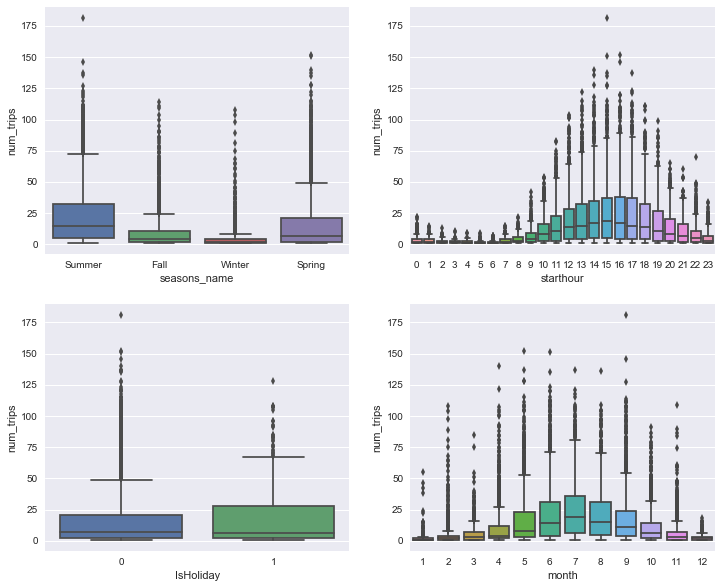

In [28]:
#at from_station_id=35
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=resultData, y="num_trips", x="seasons_name",orient="v",ax=axes[0][0])
sns.boxplot(data=resultData, y="num_trips", x="starthour",orient="v",ax=axes[0][1])
sns.boxplot(data=resultData, y="num_trips", x="IsHoliday", orient="v",ax=axes[1][0])
sns.boxplot(data=resultData, y="num_trips", x="month",orient="v",ax=axes[1][1])

In [153]:
#Categorize variables
categoricalVariables = ["from_station_id","from_station_name","month", "year", "season", "seasons_name", "IsHoliday",
                       "weather", "weatherCode", "day_name", "day", "starthour", "tripdate"]
for var in categoricalVariables:
    resultData[var] = resultData[var].astype("category")

resultData.dtypes


startday                  datetime64[ns]
starthour                       category
from_station_id                 category
num_trips                          int64
from_station_name               category
from_station_latitude            float64
from_station_longitude           float64
day                             category
month                           category
year                            category
day_name                        category
tripdate                        category
season                          category
seasons_name                    category
IsHoliday                       category
weather                         category
humidity                         float64
temperature                      float64
weatherCode                     category
dtype: object

In [31]:
#Outlier are present, will check with model, how model is better without outliers
resultDataWithoutOutliers = resultData[np.abs(resultData["num_trips"]-resultData["num_trips"].mean())<=(3*resultData["num_trips"].std())]

print("Before Ouliers removal: ",resultData.shape)
print("After Ouliers removal: ",resultDataWithoutOutliers.shape)


Before Ouliers removal:  (18224, 18)
After Ouliers removal:  (17851, 18)


In [163]:
#Correlation Analysis

X = resultData.drop(['from_station_longitude', 'from_station_name', 'day_name', 'seasons_name', 
                     'from_station_latitude', 'weather'], axis=1)



#X = resultData[['num_trips', 'humidity', 'temperature']]

X.head()
X.corr()

,num_trips,humidity,temperature
num_trips,1.000000,-0.369624,0.490936
humidity,-0.369624,1.000000,-0.115452
temperature,0.490936,-0.115452,1.000000


In [156]:
#rolling mean
t4 = resultData.groupby(['startday']).num_trips.sum().to_frame()

t4.head()

,num_trips
startday,
2013-08-05,64
2013-08-06,169
2013-08-07,117
2013-08-08,193
2013-08-09,238


In [138]:
#taking average of last 7 days
t5 = t4

t5["mean_num_trips"] = pd.rolling_mean(t5.num_trips, window=7, min_periods=1) #t4.rolling(window=7, min_periods=1).mean()
t5.head()

C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,min_periods=1,center=False).mean()


,num_trips,mean_num_trips
startday,,
2013-08-05,64,64.000000
2013-08-06,169,116.500000
2013-08-07,117,116.666667
2013-08-08,193,135.750000
2013-08-09,238,156.200000


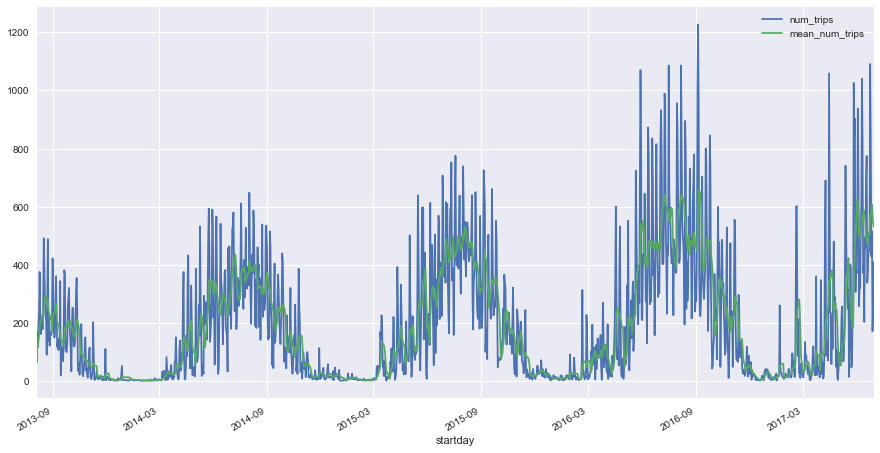

In [139]:
t5.plot(x=t5.reset_index(level=['startday']).startday, figsize=(15,8))

In [140]:
#root mean square error-baseline for predictive model
from sklearn.metrics import mean_squared_error
from math import sqrt

y = t5.num_trips
y_pred = t5.mean_num_trips

mse = mean_squared_error(y, y_pred)

print("mean squared error: %f" % mse)
print("root mean squared error: %f" % sqrt(mse))

mean squared error: 16909.637726
root mean squared error: 130.037063


In [142]:
#sampling weekly
ts_week = t4.resample('W').mean()
ts_week.head()


,num_trips,mean_num_trips
startday,,
2013-08-11,195.428571,139.601701
2013-08-18,269.571429,229.591837
2013-08-25,244.000000,279.714286
2013-09-01,209.142857,210.836735
2013-09-08,237.000000,240.489796


C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()


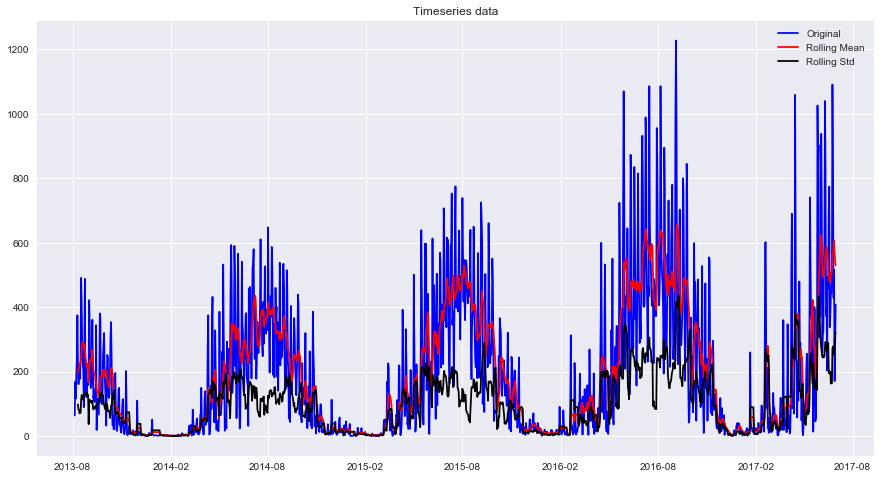

ADF Test result:
ADF Statistic: -1.773164
p-value: 0.393864
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


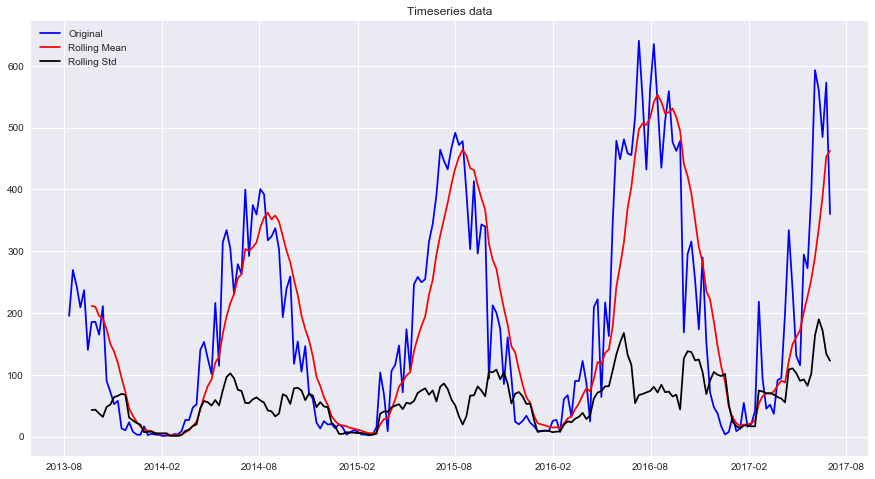

ADF Test result:
ADF Statistic: -5.465923
p-value: 0.000002
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


In [143]:
#H0: timeseries data is non-stationary
#H1 timeserise data is stationary

#as p-value is > 0.05
#fail to reject null-hypothesis
#i.e. Data is non-stationary

#Perform Dickey-Fuller test on original data

isStationary(t4.num_trips)
isStationary(ts_week.num_trips)


In [144]:
#setting base line on weekly sample data.
ts_week1 = ts_week

ts_week1["mean_num_trips"] = pd.rolling_mean(ts_week1.num_trips, window=7, min_periods=1) #t4.rolling(window=7, min_periods=1).mean()
ts_week1.head()


C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,min_periods=1,center=False).mean()


,num_trips,mean_num_trips
startday,,
2013-08-11,195.428571,195.428571
2013-08-18,269.571429,232.500000
2013-08-25,244.000000,236.333333
2013-09-01,209.142857,229.535714
2013-09-08,237.000000,231.028571


In [145]:
#mean squared error on sampling data
y_week = ts_week1.num_trips
y_week_pred = ts_week1.mean_num_trips

mse_week = mean_squared_error(y_week, y_week_pred)

print("mean squared error: %f" % mse_week)
print("root mean squared error: %f" % sqrt(mse_week))

mean squared error: 6193.819781
root mean squared error: 78.700825


C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,min_periods=1,center=False).mean()
C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,min_periods=1,center=False).std()


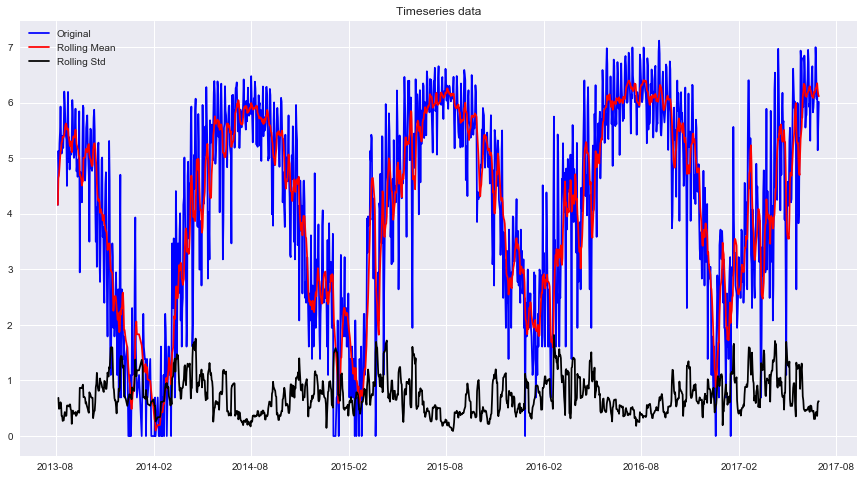

ADF Test result:
ADF Statistic: -2.158506
p-value: 0.221648
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [112]:
from numpy import log

logX = log(t4.num_trips)

isStationary(logX.dropna(inplace=False))

In [159]:
#splitting data
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test

train, validate, test = train_validate_test_split(X)

In [160]:
print(train.shape)
print(validate.shape)
print(test.shape)

(10934, 13)
(3644, 13)
(3646, 13)


In [161]:
#Creating baseline on validation set

v1 = validate
v1["mean_num_trips"] = pd.rolling_mean(v1.num_trips, window=7, min_periods=1) #t4.rolling(window=7, min_periods=1).mean()
v1.head()


C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,min_periods=1,center=False).mean()


,startday,starthour,from_station_id,num_trips,day,month,year,tripdate,season,IsHoliday,humidity,temperature,weatherCode,mean_num_trips
3052,2014-06-18,19,35,2,2,6,2014,18,0,0,0.87,62.83,4,2.000000
14704,2016-10-05,15,35,33,2,10,2016,5,2,0,0.52,79.14,1,17.500000
5070,2014-10-11,14,35,30,5,10,2014,11,2,0,0.40,56.38,1,21.666667
12960,2016-07-06,19,35,47,2,7,2016,6,1,0,0.66,80.63,1,28.000000
507,2013-09-05,10,35,5,3,9,2013,5,1,0,0.55,69.48,1,23.400000


In [162]:
#mean squared error
y = v1.num_trips
y_pred = v1.mean_num_trips

mse = mean_squared_error(y, y_pred)

print("mean squared error: %f" % mse)
print("root mean squared error: %f" % sqrt(mse))

mean squared error: 301.930326
root mean squared error: 17.376142
